In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms
from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt


# Construyendo un modelo

In [2]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified
Files already downloaded and verified


In [3]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck
frog
plane
bird


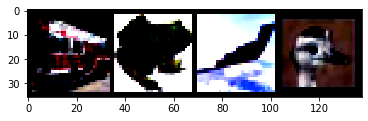

In [4]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [5]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [6]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [7]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2))

In [8]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [9]:
x = torch.tensor([1.0, 2.0, 3.0])

sigmoid(x)

tensor([0.7311, 0.8808, 0.9526])

In [10]:
sigmoid(x).sum()

tensor(2.5644)

In [11]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [12]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [13]:
softmax(x).sum()

tensor(1.)

In [14]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [45]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

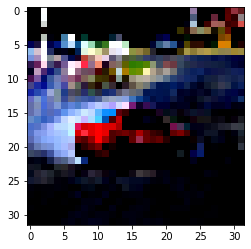

In [46]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [47]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5184, 0.4816]], grad_fn=<SoftmaxBackward>)

In [35]:
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

-> car  model: car


In [19]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 110.0]])

softmax(x)

tensor([[0., 1.]])

In [20]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [21]:
log_softmax(x)

tensor([[-110.,    0.]])

In [22]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

# Implementando un clasificador totalmente conectado

In [60]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)


n_epochs = 5

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_function(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch, %d, Loss: %f" % (epoch, float(loss)))

Epoch, 0, Loss: 0.014412
Epoch, 1, Loss: 0.117439
Epoch, 2, Loss: 0.083675
Epoch, 3, Loss: 0.006199
Epoch, 4, Loss: 0.000606


In [54]:
img, label = data_set[20]
class_names[label]



'car'

In [56]:
out = model(img.view(-1).unsqueeze(0))
print(out)
print('->',class_names[label],' model:',class_names[index])

tensor([[-0.6741, -0.7126]], grad_fn=<LogSoftmaxBackward>)
-> car  model: car


In [61]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)


n_epochs = 100

for epoch in range(n_epochs):
    for img, label in train_loader:
        out = model(img.view(img.shape[0], -1))
        loss = loss_function(out, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch, %d, Loss: %f" % (epoch, float(loss)))

Epoch, 0, Loss: 0.344241
Epoch, 1, Loss: 0.475268
Epoch, 2, Loss: 0.239675
Epoch, 3, Loss: 0.398373
Epoch, 4, Loss: 0.784687
Epoch, 5, Loss: 0.390536
Epoch, 6, Loss: 0.447511
Epoch, 7, Loss: 0.198131
Epoch, 8, Loss: 0.357902
Epoch, 9, Loss: 0.294715
Epoch, 10, Loss: 0.143128
Epoch, 11, Loss: 0.160737
Epoch, 12, Loss: 0.083765
Epoch, 13, Loss: 0.226262
Epoch, 14, Loss: 0.197066
Epoch, 15, Loss: 0.221906
Epoch, 16, Loss: 0.333537
Epoch, 17, Loss: 0.072800
Epoch, 18, Loss: 0.184434
Epoch, 19, Loss: 0.096362
Epoch, 20, Loss: 0.097162
Epoch, 21, Loss: 0.146228
Epoch, 22, Loss: 0.055246
Epoch, 23, Loss: 0.155506
Epoch, 24, Loss: 0.138311
Epoch, 25, Loss: 0.146652
Epoch, 26, Loss: 0.089360
Epoch, 27, Loss: 0.073680
Epoch, 28, Loss: 0.134145
Epoch, 29, Loss: 0.062815
Epoch, 30, Loss: 0.056310
Epoch, 31, Loss: 0.054184
Epoch, 32, Loss: 0.166906
Epoch, 33, Loss: 0.076275
Epoch, 34, Loss: 0.022290
Epoch, 35, Loss: 0.021805
Epoch, 36, Loss: 0.053218
Epoch, 37, Loss: 0.047515
Epoch, 38, Loss: 0.072

In [62]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.871500


In [63]:
img, label =validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
out

tensor([[-1.6093e-05, -1.1037e+01]], grad_fn=<LogSoftmaxBackward>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-> car  model: car


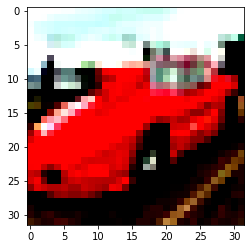

In [64]:
print('->',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1,2,0))
plt.show()

# Mejoras, limitaciones y conclusiones

In [75]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.404783
Epoch: 1, Loss: 0.445407
Epoch: 2, Loss: 0.815433
Epoch: 3, Loss: 0.416338
Epoch: 4, Loss: 0.449459
Epoch: 5, Loss: 0.557272
Epoch: 6, Loss: 0.260964
Epoch: 7, Loss: 0.426650
Epoch: 8, Loss: 0.414473
Epoch: 9, Loss: 0.180518
Epoch: 10, Loss: 0.584260
Epoch: 11, Loss: 0.276827
Epoch: 12, Loss: 0.716142
Epoch: 13, Loss: 0.272178
Epoch: 14, Loss: 0.350158
Epoch: 15, Loss: 0.069622
Epoch: 16, Loss: 0.267541
Epoch: 17, Loss: 0.244484
Epoch: 18, Loss: 0.189627
Epoch: 19, Loss: 0.131166
Epoch: 20, Loss: 0.102559
Epoch: 21, Loss: 0.205600
Epoch: 22, Loss: 0.044953
Epoch: 23, Loss: 0.041900
Epoch: 24, Loss: 0.633892
Epoch: 25, Loss: 0.013824
Epoch: 26, Loss: 0.134498
Epoch: 27, Loss: 0.035639
Epoch: 28, Loss: 0.183790
Epoch: 29, Loss: 0.046573
Epoch: 30, Loss: 0.017662
Epoch: 31, Loss: 0.006470
Epoch: 32, Loss: 0.007846
Epoch: 33, Loss: 0.027940
Epoch: 34, Loss: 0.266745
Epoch: 35, Loss: 1.264106
Epoch: 36, Loss: 0.053846
Epoch: 37, Loss: 0.004457
Epoch: 38, Loss: 0.004

KeyboardInterrupt: 

In [67]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.500000


In [68]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.500000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct:  car  model: car


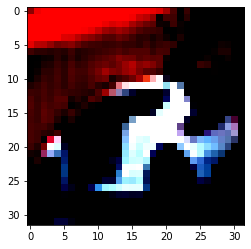

In [69]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

In [70]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [71]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [72]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [73]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car   model: car


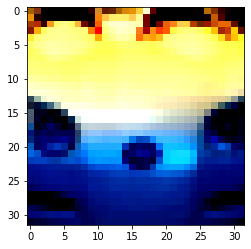

In [74]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))